In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
import sklearn.metrics
%matplotlib inline

In [5]:
df = pd.read_csv('50_Startups.txt')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [15]:
df[['isca', 'isfl']] = pd.get_dummies(df.State).loc[:, 'California':'Florida']
df = sm.add_constant(df)
df.head()

,const,R&D Spend,Administration,Marketing Spend,State,Profit,isca,isfl
0,1.0,165349.20,136897.80,471784.10,New York,192261.83,0,0
1,1.0,162597.70,151377.59,443898.53,California,191792.06,1,0
2,1.0,153441.51,101145.55,407934.54,Florida,191050.39,0,1
3,1.0,144372.41,118671.85,383199.62,New York,182901.99,0,0
4,1.0,142107.34,91391.77,366168.42,Florida,166187.94,0,1


In [18]:
df.corr()['Profit'].sort_values()

isca              -0.145837
isfl               0.116244
Administration     0.200717
Marketing Spend    0.747766
R&D Spend          0.972900
Profit             1.000000
const                   NaN
Name: Profit, dtype: float64

In [67]:
y = df.Profit
X = df[['const', 'R&D Spend', 'Administration']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [68]:
result = sm.OLS(y_train, X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     291.2
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.93e-21
Time:                        11:58:38   Log-Likelihood:                -369.58
No. Observations:                  35   AIC:                             745.2
Df Residuals:                      32   BIC:                             749.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6.337e+04   8240.344      7.690      0.000    4.66e+04    8.02e+04
R&D Spend          0.8566      0.036     24.043      0.000       0.784       0.929
Administration    -0.1206      0.066     -1.839      0.075      -0.254       0.013
==============================================================================
Omnibus:                       18.650   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.202
Skew:                          -1.336   Prob(JB):                     4.56e-07
Kurtosis:                       6.590   Cond. No.                     7.38e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'studentized residuals')

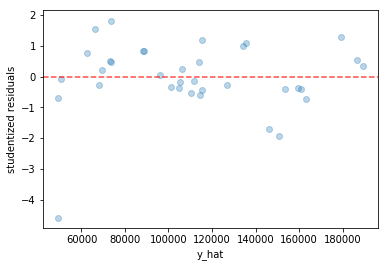

In [64]:
# plot studentized residuals
st_res = result.outlier_test()['student_resid']
yhat = result.fittedvalues
plt.scatter(yhat, st_res, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.xlabel('y_hat')
plt.ylabel('studentized residuals')

In [65]:
y_hat = result.predict(X_test)

In [66]:
sklearn.metrics.r2_score(y_test, y_hat)

0.9571309194218411